In [13]:
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [8]:
# # Define a function to parse the text file and construct a DataFrame
# def parse_log_to_dataframe(file_path):
#     data = []
#     with open(file_path, 'r') as file:
#         epoch_data = {}
#         for line in file:
#             line = line.strip()
#             if line.startswith("Epoch") and "train errors" in line:
#                 if epoch_data:  # If epoch_data is not empty, save it
#                     data.append(epoch_data)
#                     epoch_data = {}
#                 epoch_data['Epoch'] = int(re.search(r"Epoch (\d+)", line).group(1))
#                 train_errors = eval(line.split(": ", 1)[1])
#                 for k, v in train_errors.items():
#                     epoch_data[f"Train_{k}"] = v
#             elif "validation errors" in line:
#                 validation_errors = eval(line.split(": ", 1)[1])
#                 for k, v in validation_errors.items():
#                     epoch_data[f"Validation_{k}"] = v
#             elif "test errors" in line:
#                 test_errors = eval(line.split(": ", 1)[1])
#                 for k, v in test_errors.items():
#                     epoch_data[f"Test_{k}"] = v
#             elif "current learning rate" in line:
#                 epoch_data['Learning_Rate'] = float(line.split("=")[-1].strip())
#         if epoch_data:  # Append the last epoch data
#             data.append(epoch_data)

#     # Create a DataFrame
#     df = pd.DataFrame(data)
#     return df

# # Specify the file path
# file_path = "output.txt"

# # Generate the DataFrame
# df = parse_log_to_dataframe(file_path)

# # Display the first few rows of the DataFrame
# print(df.head())

# # Save the DataFrame to a CSV file if needed
# df.to_csv("parsed_data.csv", index=False)


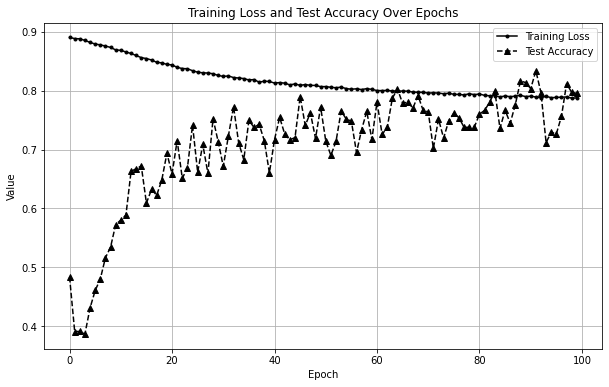

In [23]:
def plot_training_metrics(df):
    plt.figure(figsize=(10, 6))

    plt.plot(df['Epoch'], df['Train_Seg_Loss'], label='Training Loss', color='black', marker='.', linestyle='-')
    plt.plot(df['Epoch'], df['Test_Overall_Acc'], label='Test Accuracy', color='black', marker='^', linestyle='--')

    plt.title('Training Loss and Test Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.show()

df = pd.read_csv("parsed_data.csv")

# Call the function to plot
plot_training_metrics(df)
